<a href="https://colab.research.google.com/github/yoobyoungcheol/AIstudy24/blob/master/%ED%99%95%EB%A5%A0%EC%A0%81%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MBC마켓에 럭키백 성공으로 인해 각각의 지역에서 수산물을 제공하기로 하였다.
영업팀은 매주 7갸우ㅏ 샹손 즁애소 일부를 무작위로 골라 머신러닝 모델을 학습할수 있게 훈련데이터를 제공하고있다.
하지만 수산물을 제공한ㄷ나는 곳이 너무 많아서 샘플을 골라내는 일이 너무 힘들다
추가되는 수산물의 샘플도 없다.
영업팀은 새로운 생선이 도착하는 대로 가능한 즉시 훈련 데이터를 제공해야 한다.
이때 학습하는게 점진적 학습이다.

In [ ]:
# 점진적 학습

# 당면한 문제 : 훈련데이터가 한번에 준비되는 것이 아니라, 조금씩 전달됨
# 해결법 1 : 기존의 훈련데이터에 새로운 데이터를 추가하여 모델을 매일매일 다시 훈련시켜준다.
# 단점 : 시간이 지날수록 데이터가 늘어남 -> 인력추가, 서버증설, 시간적 여유가 줄어듬 -> 지속여부 X

# 해결법 2 : 새로운데이터를 추가할때마다 이전데이터를 버림 훈련데이터 크기를 일정하게 유지하는방법
# 단점 : 데이터를 버릴때 다른 데이터에 없는 중요한 생선데이터가 포함될수있다.

# 해결법 3 : 점진적 학습 방법(온라인 학습 : 훈련한 모델을 버리지 않고 조금씩 더 새로운 데이터를 학습) -> 확률적 경사 하강법

# 확률적 경사 하강법 (실제 산에서 내려오는 것 처럼 가파른 길을 찻아 천천히 조금씩 내려옴)
# 확률적 : 무작위, 랜덤 ( 훈련 세트에서 랜덤하게 하나의 샘플을 고른다.)
# 경사 : 기울기
# 하강 : 내려가는
# 확률적 경사 하강법은 훈련세트에서 랜덤하게 하나의 샘플을 선택해서 가파른 경사를 조금 내려간다.
# 위 방법을 반복수행한다.
# 만약 모든 샘플을 다 사용해도 다 내려오지 못할경우
#  처음부터 다시 시작한다.
#  훈련세트의 모든 샘플을 다시 채워 놓는다
#  다시 랜덤하게 하나의 샘플을 선택하여 이어서 경사를 내려간다.
# 만족할 만한 위치에 도달 할 때 까지 계속 내려간다
# 훈련세트를 한번 모두 사용하는 과정을 에포크(epoch)라고한다.
# 일반적인 경사 하강법은 수십 또는 수백번 에포크를 수행한다.
# 만약 : 실제로 등산이라고 가정하고 산에서 내려온다고 생각했을 때 집으로 돌아가려면
#   등산로의 입구까지 내려가야 한다.
#   만약 어떤 산길도 척척 내려갈 수 있는 초능력이 있다면 가장 빠른 길을 선택하는 것이 최선이다.
#   가장 빠른길은 경사가 가장 가파른 길!!!
# 실제로 산에서 내려올 때에는 천천히 조금씩 내려와야 한다.-> 경사하강법
# 가장 가파른 길을 찾아 내려오지만 조금씩 내려오는것이 중요하다.->훈련
# 훈련 세트를 사용해 모델을 훈련하기 때문에 경사 하강법 도 당연히 가장 가파른 길을 찾을 것
# 그런데 전채 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾는다 ->확률적
# 결론 : 훈련세트에서 랜덤하게 하나의 샘플을 선택해서 가파른 경사를 조금씩 내려간 다음 훈련세트에서
#        랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금내려감 -> 전체 샘플을 모두 사용할 때까지 진행한다.

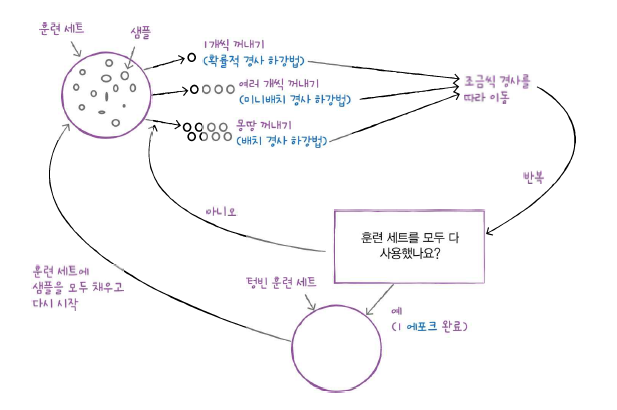

In [ ]:
# 위 방법대로 샘플 한개를 이용하면 너무 무책임하게 내려갈 수 있음 (중요한 데이터가 빠져버릴 수 있음)
# 잘못된 훈련으로 결과가 나오면 돌아갈 수 없다.
# 이러한 문제점을 해소하기 위해 무작위로 몇개의 샘플을 선택해서 경사를 내려간다면
    # 미니 배치 경사하강법 : 여러개의 샘플을 사용해서 경사하강법 진행
    # 배치 경사 하강법 : 극단적으로 한번 경사로를 따라 이동(전체 샘플사용)
        # 단점 : 컴퓨터 자원을 너무 많이 사용한다.
        # 한번에 전체 데이터를 모두 읽을 수 없을수도 있다 (컴퓨터의 사양에 따라 제한이 생김) *실경험*

# 확률적 경사 하강법은 훈련세트를 사용해 산 아래에 있는 최적의 장소로 조금씩 이동하는 알고리즘이다
# 이 때문에 훈련 데이터가 모두 준비되어 있지 않고 매일매일 업데이트 되어도 학습을 이어 나가갈 수 있다
# 다시 산꼭대기 부터 시작할 필요가 없다 -> 신경망 알고리즘을 사용한다.

In [ ]:
# 손실 함수(Loss function) -> 머신런닝이 알고리즘이 얼마나 엉터리인지 측정하는 기준( 작을수록 좋음 )
    # -> 이 값을 찾아서 조금씩 이동
# 비용 함수(Cost function) -> 훈련세트에 있는 모든 샘플에 대한 손실함수의 함
# 에포크(epoch : 시대) -> 훈련세트를 한번 모두 사용하는 과정

In [1]:
import pandas as pd

fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish.head()  # fish 에 있는 리스트 위에 5개 출력

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
#
fish_target= fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
np.set_printoptions(precision=6,suppress=True)
# 사이킷 런을 활용하여 훈련자료와 테스트 자료를 나눈다
train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target,random_state=42)

In [4]:
print(train_input)

[[ 720.       35.       40.6      16.3618    6.09  ]
 [ 500.       45.       48.        6.96      4.896 ]
 [   7.5      10.5      11.6       1.972     1.16  ]
 [ 110.       22.       23.5       5.5225    3.995 ]
 [ 140.       20.7      23.2       8.5376    3.2944]
 [  69.       18.2      20.3       5.2983    2.8217]
 [ 110.       21.       22.5       5.6925    3.555 ]
 [ 620.       34.5      39.7      15.5227    5.2801]
 [ 130.       21.3      22.8       6.384     3.534 ]
 [  85.       20.       21.        5.082     2.772 ]
 [ 685.       36.5      39.       10.881     6.864 ]
 [ 500.       31.       36.2      14.3714    4.8146]
 [ 514.       32.8      34.       10.03      6.018 ]
 [ 200.       23.       25.8      10.3458    3.6636]
 [1000.       44.       46.6      12.4888    7.5958]
 [ 714.       36.       41.5      16.517     5.8515]
 [   8.7      11.3      12.6       1.9782    1.2852]
 [1000.       43.       45.2      11.9328    7.2772]
 [ 110.       20.8      23.1       6.1677    3

In [5]:
print(train_input.shape)     # 요소가 119개 특성이 5개

(119, 5)


In [9]:
print(test_input)

[[  78.       18.7      19.4       5.1992    3.1234]
 [  13.4      12.4      13.5       2.43      1.269 ]
 [ 200.       32.3      34.8       5.568     3.3756]
 [ 270.       26.       28.7       8.3804    4.2476]
 [ 150.       23.       24.5       5.2185    3.626 ]
 [1000.       37.       42.6      18.957     6.603 ]
 [   7.       10.6      11.6       1.7284    1.1484]
 [ 180.       25.2      27.9       7.0866    3.906 ]
 [ 188.       24.6      26.2       6.7334    4.1658]
 [1250.       56.       59.7      10.6863    6.9849]
 [ 650.       33.5      38.7      14.4738    5.7276]
 [1000.       40.       43.5      12.354     6.525 ]
 [ 600.       32.       37.2      15.438     5.58  ]
 [ 150.       20.       22.4       8.8928    3.2928]
 [ 700.       35.       40.5      16.2405    5.589 ]
 [ 920.       38.5      44.1      18.0369    6.3063]
 [1000.       43.5      46.       12.604     8.142 ]
 [ 218.       26.5      28.        7.168     4.144 ]
 [ 225.       24.       25.5       7.293     3

In [10]:
print(test_input.shape) # 40개의 요소 5개의 특성

(40, 5)


In [11]:
print(train_target) # 훈련정답 119개

['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki' 'Roach' 'Perch' 'Bream' 'Perch'
 'Perch' 'Perch' 'Bream' 'Perch' 'Parkki' 'Perch' 'Bream' 'Smelt' 'Perch'
 'Roach' 'Bream' 'Pike' 'Bream' 'Pike' 'Perch' 'Parkki' 'Bream' 'Perch'
 'Pike' 'Bream' 'Perch' 'Parkki' 'Roach' 'Perch' 'Bream' 'Roach' 'Perch'
 'Bream' 'Bream' 'Perch' 'Perch' 'Roach' 'Pike' 'Perch' 'Smelt' 'Pike'
 'Roach' 'Perch' 'Parkki' 'Perch' 'Bream' 'Perch' 'Smelt' 'Perch' 'Parkki'
 'Smelt' 'Perch' 'Perch' 'Roach' 'Bream' 'Perch' 'Perch' 'Roach' 'Roach'
 'Perch' 'Perch' 'Bream' 'Roach' 'Bream' 'Roach' 'Parkki' 'Perch' 'Perch'
 'Perch' 'Perch' 'Pike' 'Pike' 'Perch' 'Bream' 'Perch' 'Bream' 'Whitefish'
 'Pike' 'Bream' 'Bream' 'Roach' 'Perch' 'Pike' 'Bream' 'Pike' 'Parkki'
 'Roach' 'Perch' 'Roach' 'Smelt' 'Whitefish' 'Roach' 'Perch' 'Bream'
 'Whitefish' 'Smelt' 'Pike' 'Roach' 'Smelt' 'Bream' 'Roach' 'Pike' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Smelt' 'Bream' 'Parkki' 'Perch'
 'Bream' 'Perch' 'Perch']


In [12]:
print(test_target) # 테스트 정답 40개

['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch' 'Bream' 'Smelt' 'Roach'
 'Perch' 'Pike' 'Bream' 'Whitefish' 'Bream' 'Parkki' 'Bream' 'Bream'
 'Perch' 'Perch' 'Perch' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream'
 'Perch' 'Perch' 'Whitefish' 'Smelt' 'Smelt' 'Pike' 'Perch' 'Perch' 'Pike'
 'Bream' 'Perch' 'Roach' 'Roach' 'Parkki' 'Perch']


In [14]:
from sklearn.preprocessing import StandardScaler
# 훈련세트와 테스트 세트의 특성을 표준점수 전처리
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:5])

[[ 0.919658  0.609432  0.810412  1.851949  1.000757]
 [ 0.300412  1.546534  1.453166 -0.469817  0.272917]
 [-1.085854 -1.68647  -1.708486 -1.701598 -2.004476]
 [-0.797341 -0.608802 -0.674869 -0.824806 -0.276315]
 [-0.712899 -0.730625 -0.700927 -0.08023  -0.703387]]


In [15]:
print(test_scaled[:5])

[[-0.887414 -0.918046 -1.030989 -0.904645 -0.807625]
 [-1.069247 -1.50842  -1.543455 -1.588496 -1.938032]
 [-0.544014  0.356414  0.306633 -0.81357  -0.653889]
 [-0.346981 -0.233961 -0.223205 -0.11905  -0.122335]
 [-0.684751 -0.515091 -0.588011 -0.899878 -0.50125 ]]


In [16]:
from sklearn.linear_model import SGDClassifier
# SGDClassifier : 사이킷런의 확률적 경사 하강법 제공, 2개의 매개변수를 지정
# loss = log_loss : 로지스틱 손실 함수 지정
# max_iter=10 :  10회 에포크 반복 (전체 훈련세트를 10회 반복)
sc = SGDClassifier(loss='log_loss',max_iter=10,random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))   # 77.31%
print(sc.score(test_scaled,test_target))     # 77.5%  -> 반복횟수 부족으로 max_iter을 향상후 훈련

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [17]:
# 확률적 경사 하강법은 점진적 학습이 가능하다고 했음
# SGDClassifier 라는 갹체를 또 만들지말고 훈련한 모델을 sc로 추가하여 훈련을 추가한다
sc.partial_fit(train_scaled,train_target) # 반복적인 학습

print(sc.score(train_scaled,train_target))   # 79.83%
print(sc.score(test_scaled,test_target))     # 77.5%
# 퍼센트가 증가함 -> 무작정 부분적인 학습을 계속하는것은 의미가 없음 => 기준점을 제공해야 함
# 현재는 등산 내려오다가정지된 느낌  ( 에포크 회수 부족 )

0.7983193277310925
0.775


In [ ]:
# 에포크와 과대/과소적합
# 확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소or과대 적합이 될 수 있다.
# 에포크 회수가 적으면 훈련세트를 덜 학습한다. (119개에서 10번만 랜덤 추출하고 정지)
#에포크 회수가 충분히 많으면 훈련세트를 완전히 학습할 것이다. (Good! but 에포크 회수가 너무 많으면 시간이 오래걸린)
# 바꾸어 말하면 적은 에포크 회수 동안에 훈련된 모델은 훈련세트와 테스트세트에 맞지 않음 (과소적합)
# 반대로 에포크 횟수가 많은 훈련 모델인 경우 너무 잘맞아 테스트 세트에는 오히려 점수가 낮아짐 (과대적합)
# 과대 적합이 되기 전에 훈련을 멈추는 것 ( 조기 종료 )



In [20]:
import numpy as np

sc = SGDClassifier(loss='log_loss',random_state=42)

train_score = []  # 훈련세트 점수를 누적하는 빈리스트
test_score = []   # 테스트 세트 점수를 누적하는 리스트
# train_target에 있는 7개의 생선목록을 제공
classes = np.unique(train_target)

# 파이썬의 _ 변수는 1회용
for _ in range(0,300): # 300번의 에포크 동안 훈련 진행
    sc.partial_fit(train_scaled,train_target,classes=classes) # 훈련을 부분적으로 추가하는 partial_fit
    # 반복마다 훈련세트와 테스트세트의 점수를 계산하여 각 score 리스트에 추가해준다
    train_score.append(sc.score(train_scaled,train_target))   # 훈련세트의 점수를 train_score리스트에 추가
    test_score.append(sc.score(test_scaled,test_target))      # 훈련세트의 점수를 train_score리스트에 추가

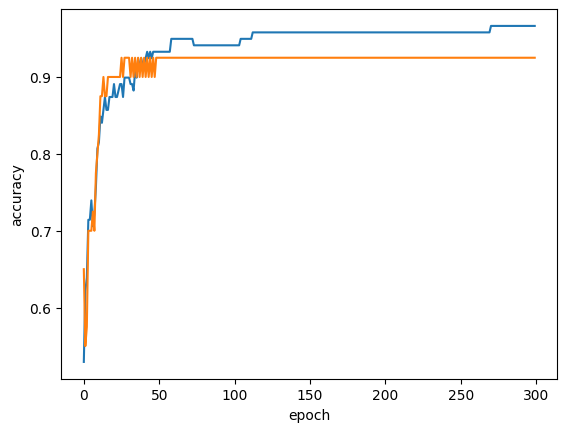

In [21]:
import matplotlib.pyplot as plt

plt.plot(train_score)   # 훈련세트점수
plt.plot(test_score)    # 테스트 세트 점수
plt.xlabel('epoch')     # 에포크 횟수
plt.ylabel('accuracy')  # 정확도
plt.show()

In [23]:
# 결론 에포크(epoch) 회수를 100번 정도 돌리니 차트상으로 과대or과소 적합이 아님 (이부분이 최고 좋은결과를 리턴한다.)
# tol = None 는 조기종료를 안함으로 에포크 회수만큼 무조건 돌리라는 뜻이다 없으면 조기 종료를 하고
# tol = 1e-3 같은 직접적인 수치를 넣어줄 수 있다.
# 확률적 경사 하갈법은 일정 에포크 동안 성능이 향상(개선)되지 않으면 더이상 훈련되지 않고 자동으로 종료

sc = SGDClassifier(loss='log_loss',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))   # 95.79%
print(sc.score(test_scaled,test_target))     # 92.5%

0.957983193277311
0.925


In [24]:
sc.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype='<U9')

In [31]:
proba = sc.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.   , 0.003, 0.774, 0.   , 0.219, 0.   , 0.005],
       [0.   , 0.001, 0.015, 0.   , 0.04 , 0.945, 0.   ],
       [0.   , 0.   , 0.011, 0.96 , 0.02 , 0.008, 0.001],
       [0.   , 0.   , 0.525, 0.   , 0.423, 0.   , 0.052],
       [0.   , 0.   , 0.688, 0.   , 0.306, 0.   , 0.006]])

In [33]:
sc.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='<U9')

In [34]:
# 손실함수에 대한 loss 매개값
# loss 매개값의 기본값은 loss=hinge (힌지손실) -> 서포트 백터 머신이라고 부름
# 또 다른 머신러닝 알고리즘을 위한 손실함수 이다.

sc = SGDClassifier(loss='hinge',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))   # 95.79%(log_loss)   94.95%(hinge)
print(sc.score(test_scaled,test_target))     # 92.5%(log_loss)    92.5%(hinge)

0.9495798319327731
0.925


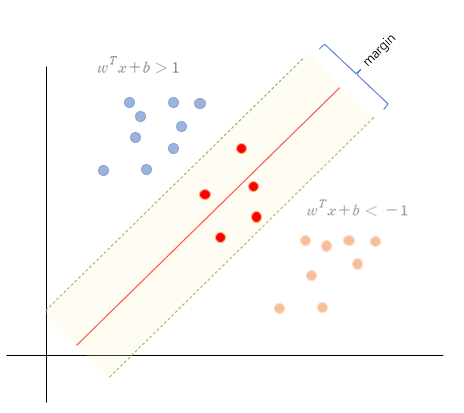